In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib import patheffects
import matplotlib.transforms as mtrans

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 1.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.0})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.0})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.0})
plt.rcParams.update({'ytick.minor.width': 1.0})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

interval  = np.linspace(-1.,3.,5)
cm        = plt.get_cmap('coolwarm') 
cNorm     = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

color1    = scalarMap.to_rgba(interval[1])
color2    = 'silver'#scalarMap.to_rgba(interval[2])
color3    = scalarMap.to_rgba(interval[3])

interval  = np.linspace(-1.,3.,5)
cm        = plt.get_cmap('PiYG_r') 
cNorm     = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

color11    = scalarMap.to_rgba(interval[1])
color22    = 'silver'#scalarMap.to_rgba(interval[2])
color33    = scalarMap.to_rgba(interval[3])

In [5]:
labels = [
    'Ricci (compact)',
    'DSHARP (default)',
    r'DSHARP (highwater)',
    'DSHARP (icefree)',
    'Zubko (ACH2)',
    'Zubko (BE)',
    'Jäger  (400 degC)',
    'Jäger  (600 degC)',
    'Jäger  (800 degC)',
    'Jäger  (1000 degC)',
    r'Draine ($a=0.01$ par)',
    r'Draine ($a=0.01$ perp)',
    r'Draine ($a=0.10$ par)',
    r'Draine ($a=0.10$ perp)',
]

In [6]:
med_comp, e16_comp, e84_comp, amed_comp, ae16_comp, ae84_comp = np.loadtxt('summary_all_compositions.dat',unpack=True)

<IPython.core.display.Javascript object>


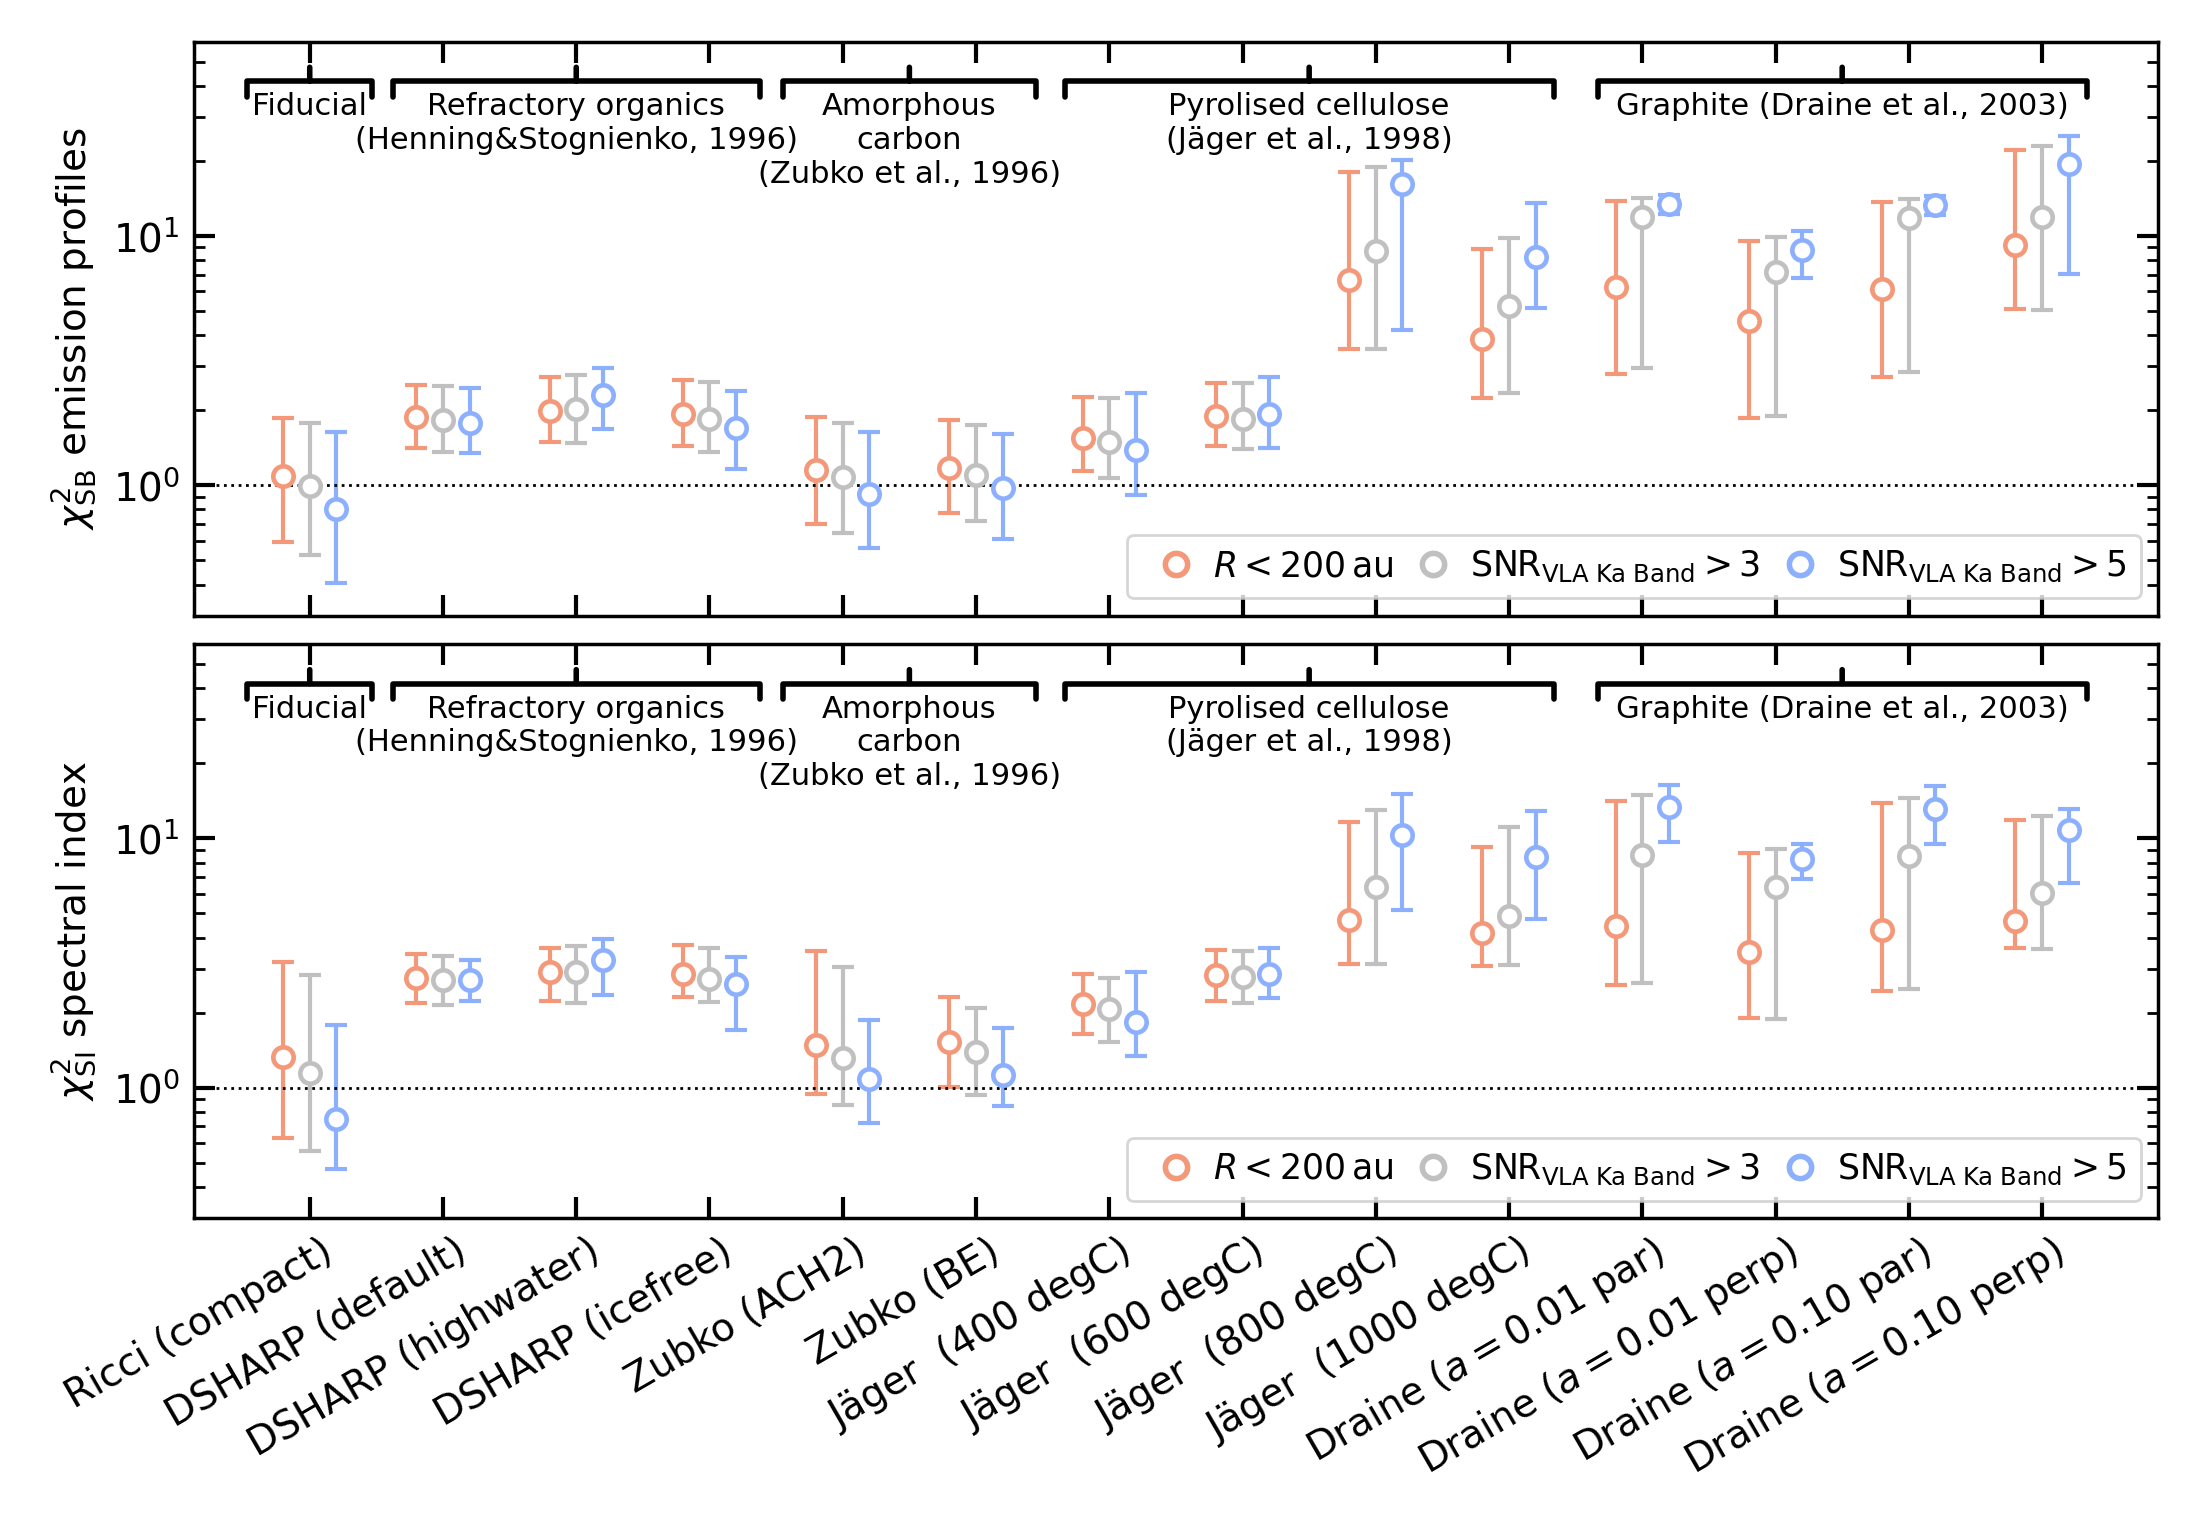

In [7]:
fig, axs = plt.subplots(2,1,figsize=(11,7.65),sharex=True)

color  = [color3,color2,color1]
offset = [-0.2,0.0,0.2]

for idx in range(len(color)):
    axs[0].errorbar(
        np.arange(len(labels)) + offset[idx], med_comp[idx::3], [e16_comp[idx::3], e84_comp[idx::3]],
        ls='none', lw=1.5, marker='o', ms=8, capsize=4, capthick=1.5, color=color[idx]
    )
    axs[0].scatter(
        np.arange(len(labels)) + offset[idx], med_comp[idx::3], marker='o', s=32,
        facecolors='w', edgecolors=color[idx], lw=0., zorder=10,
    )

    axs[1].errorbar(
        np.arange(len(labels)) + offset[idx], amed_comp[idx::3], [ae16_comp[idx::3], ae84_comp[idx::3]], 
        ls='none', lw=1.5, marker='o', ms=8, capsize=4, capthick=1.5, color=color[idx]
    )
    axs[1].scatter(
        np.arange(len(labels)) + offset[idx], amed_comp[idx::3], marker='o', s=32, 
        facecolors='w', edgecolors=color[idx], lw=0., zorder=10
    )
    
axs[1].set_xticks(np.arange(len(labels)), labels, rotation=30, ha='right')

trans = mtrans.Affine2D().translate(30, 0)
for t in axs[1].get_xticklabels():
    t.set_transform(t.get_transform()+trans)

axs[0].set_ylabel(r'$\chi^2_{\rm SB}$ emission profiles')
axs[1].set_ylabel(r'$\chi^2_{\rm SI}$ spectral index')

axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_ylim(0.3,60.)
axs[1].set_ylim(0.3,60.)

axs[0].axhline(1,ls=':',lw=1,c='k')
axs[1].axhline(1,ls=':',lw=1,c='k')

legend_elements = [
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color3, lw=2., label=r'$R<200\,{\rm au}$'),
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color2, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>3$'),
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color1, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>5$'),
]

#fig.legend(
#    handles=legend_elements, loc='upper right', ncol=3,
#    bbox_to_anchor=(0.975,0.61), fontsize=12.5, handletextpad=0.075, columnspacing=0.125
#)

for i in range(2):
    axs[i].annotate(
        'Fiducial\n\n', xy=(0, 50), xytext=(0, 15.5), #xycoords='axes fraction', 
        fontsize=11, ha='center', va='bottom',
        #bbox=dict(boxstyle='square', fc='white', color='k'),
        arrowprops=dict(arrowstyle=']-, widthA=2.050, lengthA=0.5', lw=2.0, color='k')
    )

    axs[i].annotate(
        'Refractory organics\n(Henning&Stognienko, 1996)\n', xy=(2.0, 50), xytext=(2.0, 15.5), #xycoords='axes fraction', 
        fontsize=11, ha='center', va='bottom',
        #bbox=dict(boxstyle='square', fc='white', color='k'),
        arrowprops=dict(arrowstyle=']-, widthA=6.000, lengthA=0.5', lw=2.0, color='k')
    )

    axs[i].annotate(
        'Amorphous\ncarbon\n(Zubko et al., 1996)', xy=(4.5, 50), xytext=(4.5, 15.5), #xycoords='axes fraction', 
        fontsize=11, ha='center', va='bottom',
        #bbox=dict(boxstyle='square', fc='white', color='k'),
        arrowprops=dict(arrowstyle=']-, widthA=4.150, lengthA=0.5', lw=2.0, color='k')
    )

    axs[i].annotate(
        'Pyrolised cellulose\n(Jäger et al., 1998)\n', xy=(7.5, 50), xytext=(7.5, 15.5), #xycoords='axes fraction', 
        fontsize=11, ha='center', va='bottom',
        #bbox=dict(boxstyle='square', fc='white', color='k'),
        arrowprops=dict(arrowstyle=']-, widthA=8.000, lengthA=0.5', lw=2.0, color='k')
    )

    axs[i].annotate(
        'Graphite (Draine et al., 2003)\n\n', xy=(11.5, 50), xytext=(11.5, 15.5), #xycoords='axes fraction', 
        fontsize=11, ha='center', va='bottom',
        #bbox=dict(boxstyle='square', fc='white', color='k'),
        arrowprops=dict(arrowstyle=']-, widthA=8.000, lengthA=0.5', lw=2.0, color='k')
    )

    axs[i].legend(
        handles=legend_elements, loc='lower right', ncol=3,
        fontsize=12.5, handletextpad=0.075, columnspacing=0.125
    )

fig.tight_layout()
plt.subplots_adjust(hspace=0.05)

plt.savefig('reduced_chisquared_all.pdf',bbox_inches='tight')

plt.show()

In [8]:
labels = [
    'Ricci (compact)',
    'DSHARP (compact)',
    'Ricci (10% porosity)',
    'DSHARP (10% porosity)',
    'Ricci (30% porosity)',
    'DSHARP (30% porosity)',
    'Ricci (50% porosity)',
    'DSHARP (50% porosity)',
    'Ricci (70% porosity)',
    'DSHARP (70% porosity)',
    'Ricci (90% porosity)',
    'DSHARP (90% porosity)',
]

In [9]:
med_comp,e16_comp,e84_comp,amed_comp,ae16_comp,ae84_comp = np.loadtxt('summary_all_porosities.dat',unpack=True)

<IPython.core.display.Javascript object>


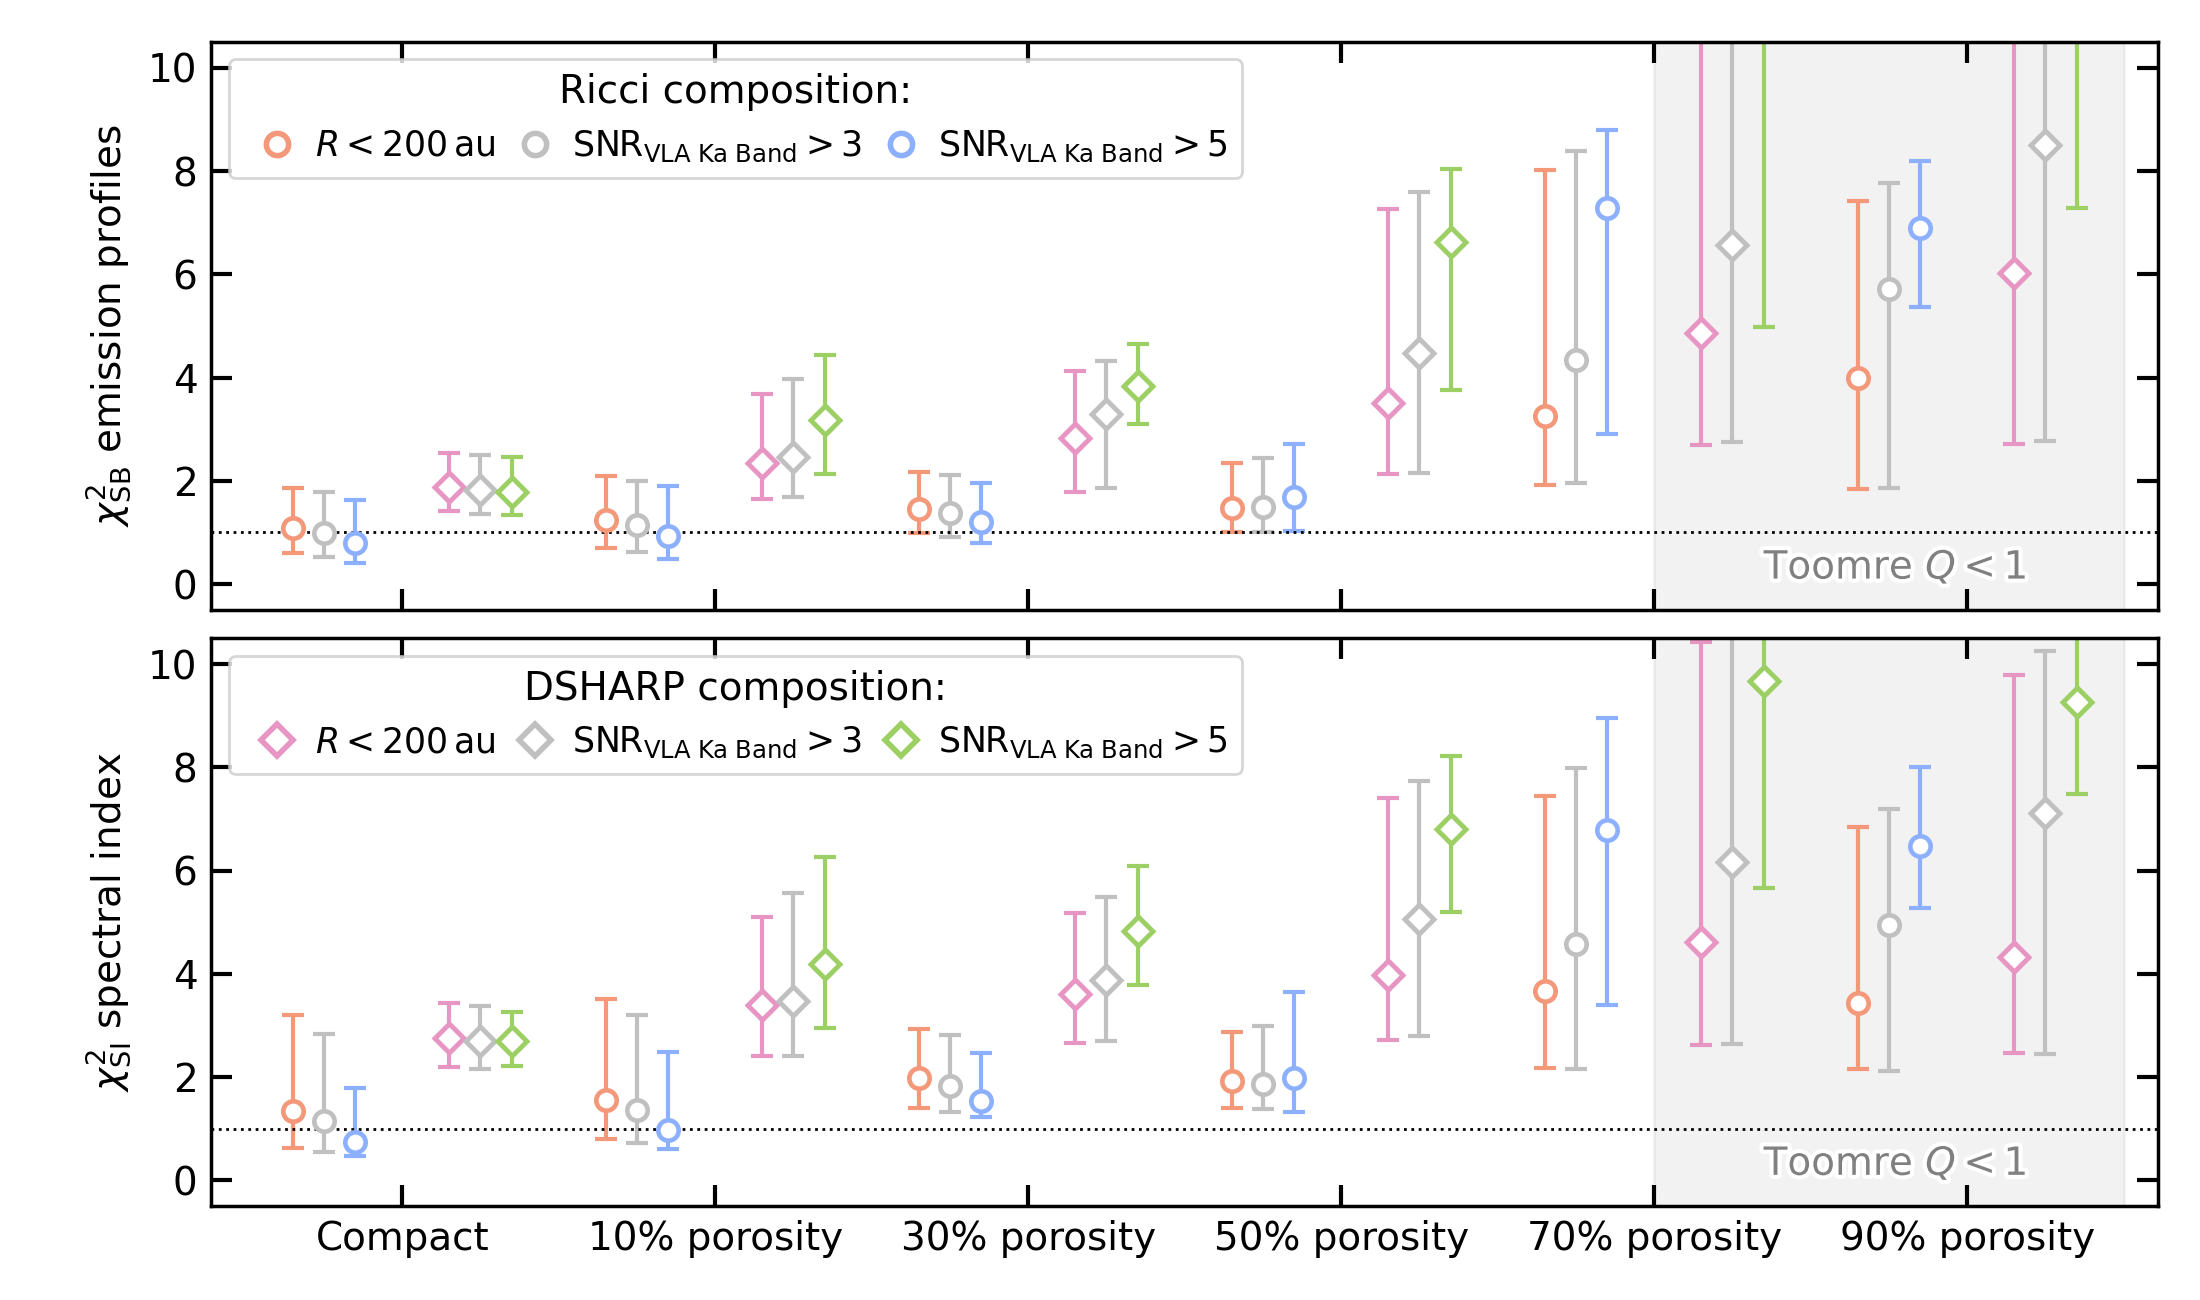

In [10]:
fig, axs = plt.subplots(2,1,figsize=(11,6.5),sharex=True)

color  = [[color3,color2,color1],[color33,color22,color11]]
offset = [-0.2,0.0,0.2]
marker = ['o','D']

for idx in range(len(color[0])):
    for j in range(len(marker)):
        axs[0].errorbar(
            np.arange(len(labels))[j::2] + offset[idx], med_comp[idx+3*j::6], [e16_comp[idx+3*j::6], e84_comp[idx+3*j::6]],
            ls='none', lw=1.5, marker=marker[j], ms=8, capsize=4, capthick=1.5, color=color[j][idx]
        )
        axs[0].scatter(
            np.arange(len(labels))[j::2] + offset[idx], med_comp[idx+3*j::6], marker=marker[j], s=32,
            facecolors='w', edgecolors=color[j][idx], lw=0., zorder=10
        )

        axs[1].errorbar(
            np.arange(len(labels))[j::2] + offset[idx], amed_comp[idx+3*j::6], [ae16_comp[idx+3*j::6], ae84_comp[idx+3*j::6]], 
            ls='none', lw=1.5, marker=marker[j], ms=8, capsize=4, capthick=1.5, color=color[j][idx]
        )
        axs[1].scatter(
            np.arange(len(labels))[j::2] + offset[idx], amed_comp[idx+3*j::6], marker=marker[j], s=32, 
            facecolors='w', edgecolors=color[j][idx], lw=0., zorder=10
        )
    
axs[0].set_ylabel(r'$\chi^2_{\rm SB}$ emission profiles')
axs[1].set_ylabel(r'$\chi^2_{\rm SI}$ spectral index')

axs[0].set_ylim(-0.5,10.5)
axs[1].set_ylim(-0.5,10.5)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[0].set_ylim(0.3,20.)
#axs[1].set_ylim(0.3,20.)

axs[0].axhline(1,ls=':',lw=1,c='k')
axs[1].axhline(1,ls=':',lw=1,c='k')

legend_elements = [
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color3, lw=2., label=r'$R<200\,{\rm au}$'),
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color2, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>3$'),
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color1, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>5$'),
]

axs[0].legend(
    handles=legend_elements, loc='upper left', ncol=3, fontsize=12.5, handletextpad=0.075, columnspacing=0.125,
    title='Ricci composition:'
)

#legend_elements = [
#    Line2D([0], [0], ls='none', marker='o', ms=8, mew=1.75, mfc='w', color='k', lw=2., label=r'Ricci composition'),
#    Line2D([0], [0], ls='none', marker='D', ms=8, mew=1.75, mfc='w', color='k', lw=2., label=r'DSHARP composition'),
#]

#axs[1].legend(
#    handles=legend_elements, loc='upper left', ncol=2, fontsize=12.5, handletextpad=0.075, columnspacing=0.125
#)

legend_elements = [
    Line2D([0], [0], ls='none', marker='D', ms=8, mew=2, mfc='w', color=color33, lw=2., label=r'$R<200\,{\rm au}$'),
    Line2D([0], [0], ls='none', marker='D', ms=8, mew=2, mfc='w', color=color22, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>3$'),
    Line2D([0], [0], ls='none', marker='D', ms=8, mew=2, mfc='w', color=color11, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>5$'),
]

axs[1].legend(
    handles=legend_elements, loc='upper left', ncol=3, fontsize=12.5, handletextpad=0.075, columnspacing=0.125,
    title='DSHARP composition:'
)

fig.tight_layout()
plt.subplots_adjust(hspace=0.05)

for i in range(len(axs)):
    axs[i].fill_between([8.5,11.5],-1,50,alpha=0.1,color='gray')
    axs[i].set_xlim(-0.72, 11.72)

    #axs[i].text(9.05,0.125,r'Toomre $Q<1$',c='gray')
    axs[i].text(9.2,0.1,r'Toomre $Q<1$',c='gray', path_effects=[patheffects.withStroke(linewidth=3, foreground="w")])

axs[0].set_xticks(
    [0.5,2.5,4.5,6.5,8.5,10.5],
    ['','','','','',''],
)

axs[1].set_xticks(
    [0.5,2.5,4.5,6.5,8.5,10.5],
    ['Compact','10% porosity','30% porosity','50% porosity','70% porosity','90% porosity'],
)

plt.savefig('reduced_chisquared_porosity_all.pdf',bbox_inches='tight')

plt.show()

In [11]:
med_comp,e16_comp,e84_comp,amed_comp,ae16_comp,ae84_comp = np.loadtxt('summary_all_porosities_kataokamix.dat',unpack=True)

<IPython.core.display.Javascript object>


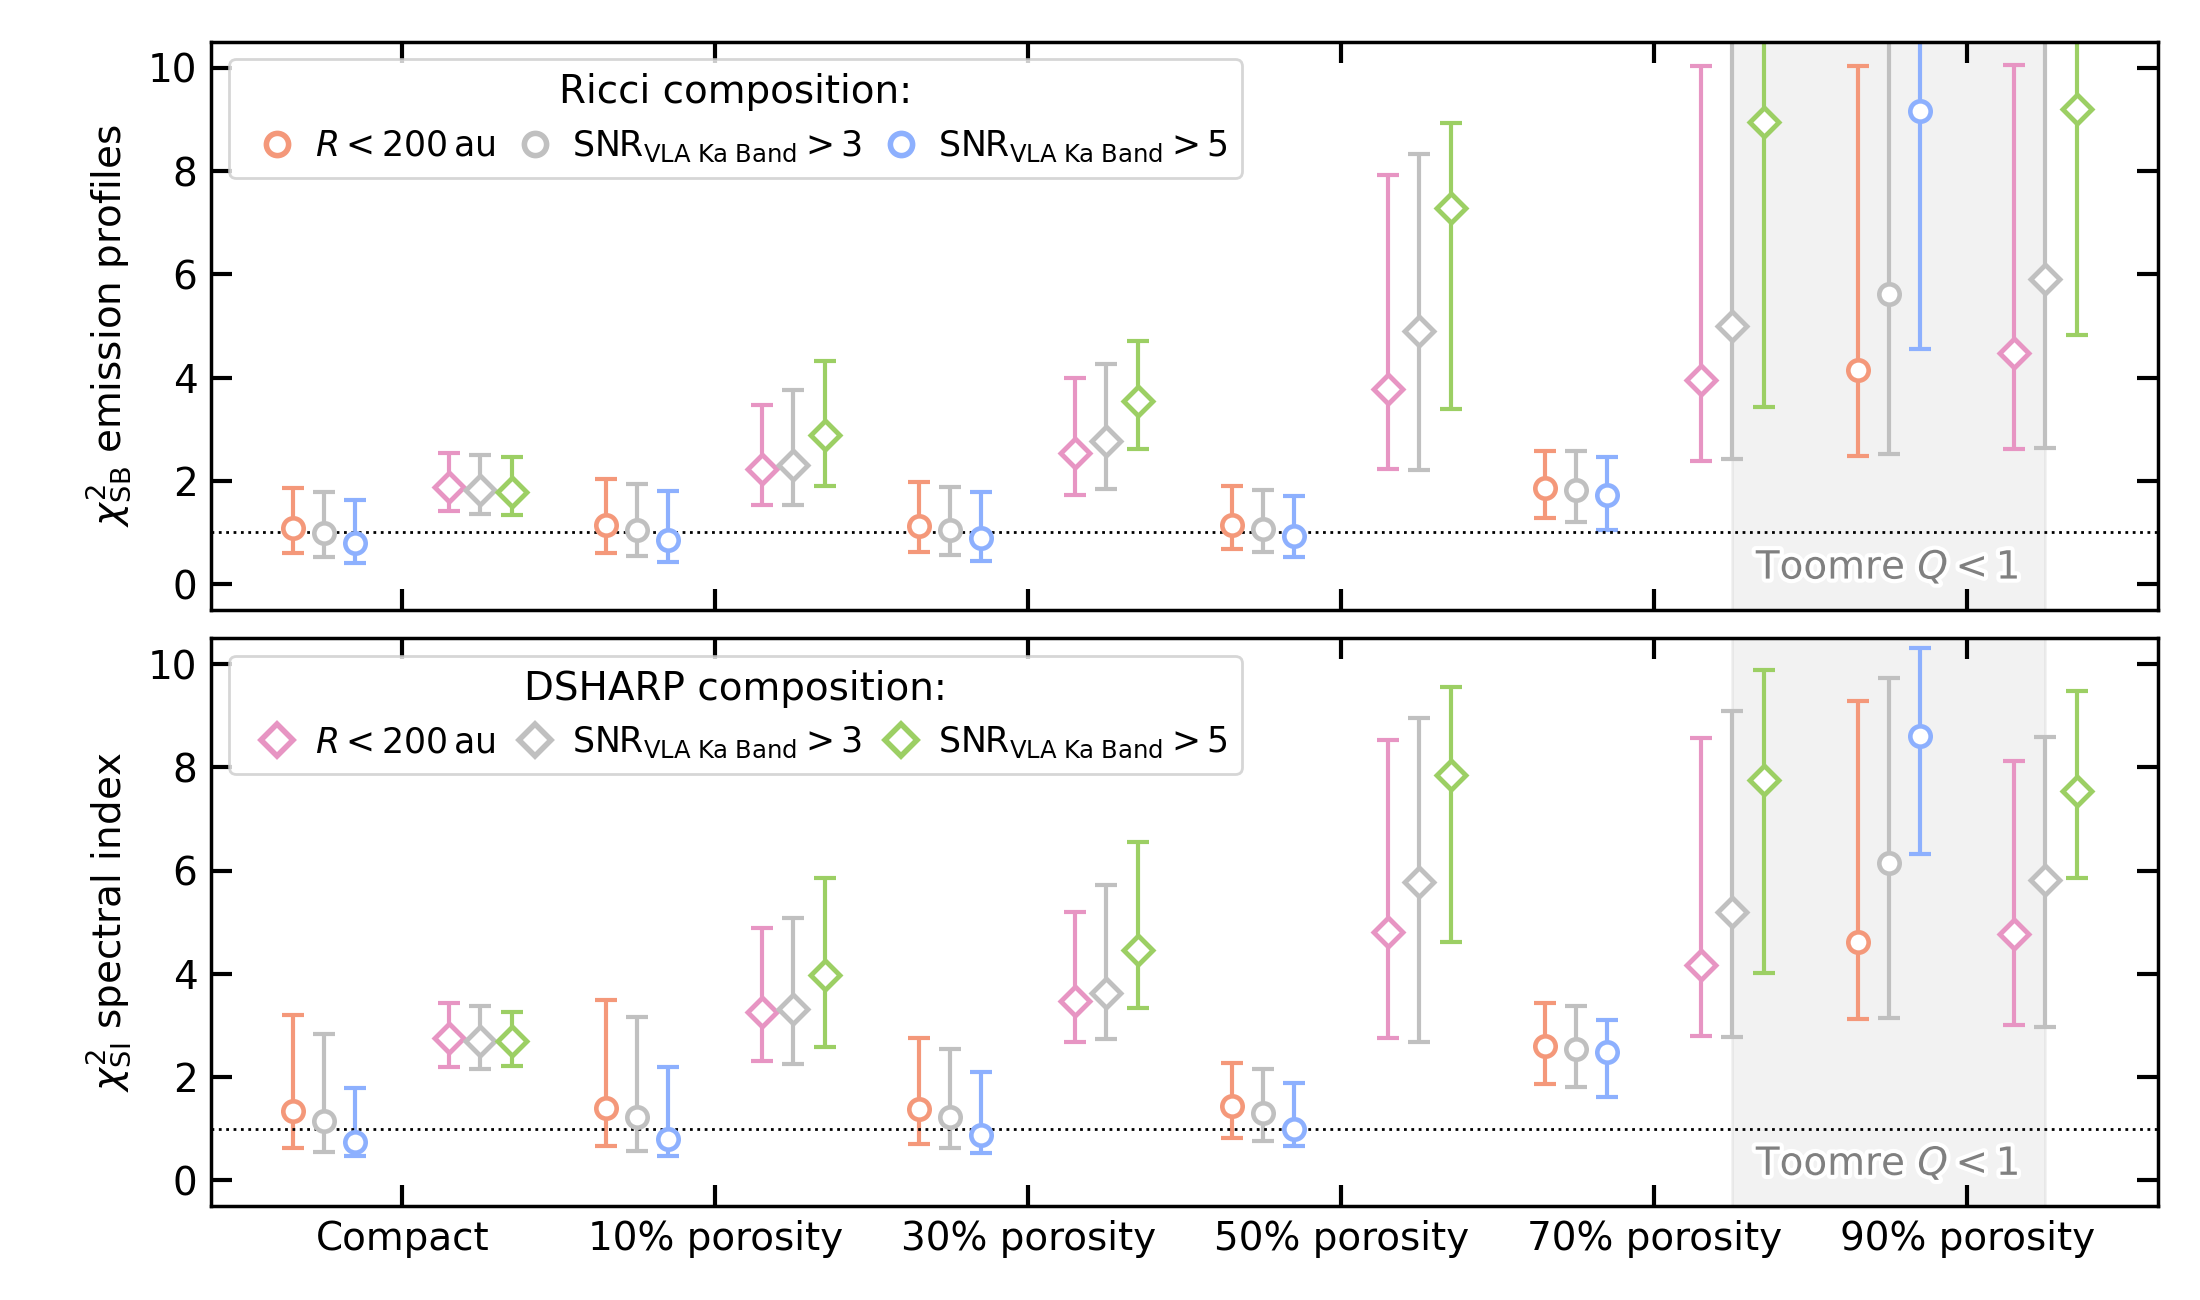

In [12]:
fig, axs = plt.subplots(2,1,figsize=(11,6.5),sharex=True)

color  = [[color3,color2,color1],[color33,color22,color11]]
offset = [-0.2,0.0,0.2]
marker = ['o','D']

for idx in range(len(color[0])):
    for j in range(len(marker)):
        axs[0].errorbar(
            np.arange(len(labels))[j::2] + offset[idx], med_comp[idx+3*j::6], [e16_comp[idx+3*j::6], e84_comp[idx+3*j::6]],
            ls='none', lw=1.5, marker=marker[j], ms=8, capsize=4, capthick=1.5, color=color[j][idx]
        )
        axs[0].scatter(
            np.arange(len(labels))[j::2] + offset[idx], med_comp[idx+3*j::6], marker=marker[j], s=32,
            facecolors='w', edgecolors=color[j][idx], lw=0., zorder=10
        )

        axs[1].errorbar(
            np.arange(len(labels))[j::2] + offset[idx], amed_comp[idx+3*j::6], [ae16_comp[idx+3*j::6], ae84_comp[idx+3*j::6]], 
            ls='none', lw=1.5, marker=marker[j], ms=8, capsize=4, capthick=1.5, color=color[j][idx]
        )
        axs[1].scatter(
            np.arange(len(labels))[j::2] + offset[idx], amed_comp[idx+3*j::6], marker=marker[j], s=32, 
            facecolors='w', edgecolors=color[j][idx], lw=0., zorder=10
        )
    
axs[0].set_ylabel(r'$\chi^2_{\rm SB}$ emission profiles')
axs[1].set_ylabel(r'$\chi^2_{\rm SI}$ spectral index')

axs[0].set_ylim(-0.5,10.5)
axs[1].set_ylim(-0.5,10.5)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[0].set_ylim(0.3,20.)
#axs[1].set_ylim(0.3,20.)

axs[0].axhline(1,ls=':',lw=1,c='k')
axs[1].axhline(1,ls=':',lw=1,c='k')

legend_elements = [
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color3, lw=2., label=r'$R<200\,{\rm au}$'),
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color2, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>3$'),
    Line2D([0], [0], ls='none', marker='o', ms=8, mew=2, mfc='w', color=color1, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>5$'),
]

axs[0].legend(
    handles=legend_elements, loc='upper left', ncol=3, fontsize=12.5, handletextpad=0.075, columnspacing=0.125,
    title='Ricci composition:'
)

#legend_elements = [
#    Line2D([0], [0], ls='none', marker='o', ms=8, mew=1.75, mfc='w', color='k', lw=2., label=r'Ricci composition'),
#    Line2D([0], [0], ls='none', marker='D', ms=8, mew=1.75, mfc='w', color='k', lw=2., label=r'DSHARP composition'),
#]

#axs[1].legend(
#    handles=legend_elements, loc='upper left', ncol=2, fontsize=12.5, handletextpad=0.075, columnspacing=0.125
#)

legend_elements = [
    Line2D([0], [0], ls='none', marker='D', ms=8, mew=2, mfc='w', color=color33, lw=2., label=r'$R<200\,{\rm au}$'),
    Line2D([0], [0], ls='none', marker='D', ms=8, mew=2, mfc='w', color=color22, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>3$'),
    Line2D([0], [0], ls='none', marker='D', ms=8, mew=2, mfc='w', color=color11, lw=2., label=r'${\rm SNR}_{\rm VLA}\, _{\rm Ka}\, _{\rm Band}>5$'),
]

axs[1].legend(
    handles=legend_elements, loc='upper left', ncol=3, fontsize=12.5, handletextpad=0.075, columnspacing=0.125,
    title='DSHARP composition:'
)

fig.tight_layout()
plt.subplots_adjust(hspace=0.05)

for i in range(len(axs)):
    axs[i].fill_between([9.0,11.0],-1,50,alpha=0.1,color='gray')
    axs[i].set_xlim(-0.72, 11.72)

    #axs[i].text(9.05,0.125,r'Toomre $Q<1$',c='gray')
    axs[i].text(9.15,0.1,r'Toomre $Q<1$',c='gray', path_effects=[patheffects.withStroke(linewidth=3, foreground="w")])

axs[0].set_xticks(
    [0.5,2.5,4.5,6.5,8.5,10.5],
    ['','','','','',''],
)

axs[1].set_xticks(
    [0.5,2.5,4.5,6.5,8.5,10.5],
    ['Compact','10% porosity','30% porosity','50% porosity','70% porosity','90% porosity'],
)

plt.savefig('reduced_chisquared_porosity_all_kataokamix.pdf',bbox_inches='tight')

plt.show()